In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [7]:
df=pd.read_csv('train_titanic.csv')



In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


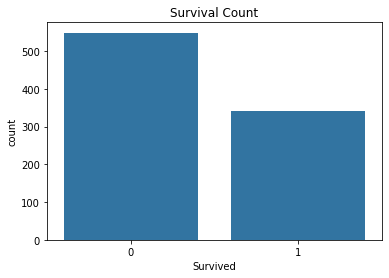

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart of Survived column
sns.countplot(x=df['Survived'])
plt.title('Survival Count')
plt.show()


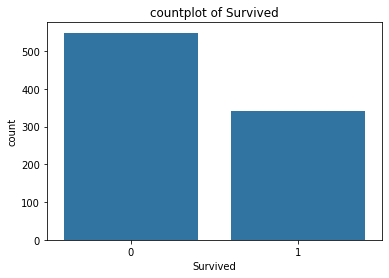

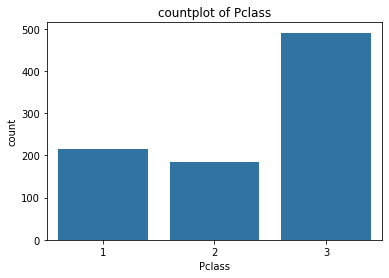

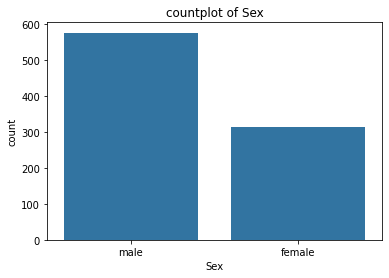

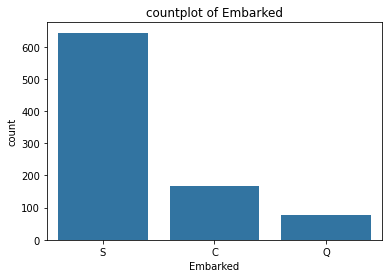

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
bar_cols=['Survived','Pclass','Sex','Embarked']
for col in bar_cols:
    sns.countplot(x=col,data=df)
    plt.title(f'countplot of {col}')
    plt.show()

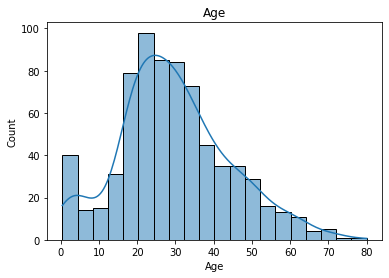

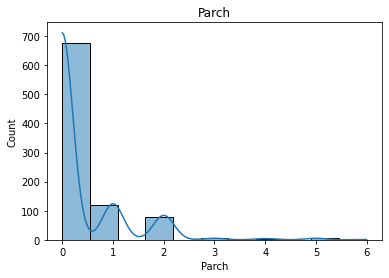

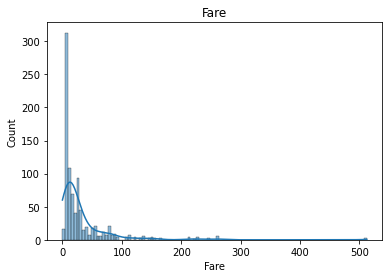

In [6]:
cols=['Age','Parch','Fare']
for c in cols:
    sns.histplot(data=df, x=c,edgecolor='black',kde=True)
    plt.title(c)
    plt.show()

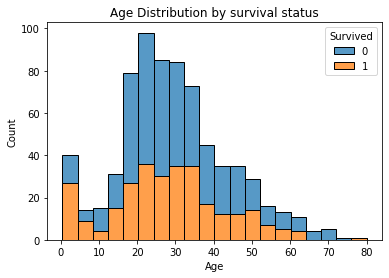

In [7]:
sns.histplot(data=df, x='Age',hue='Survived',multiple='stack')
plt.title("Age Distribution by survival status")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

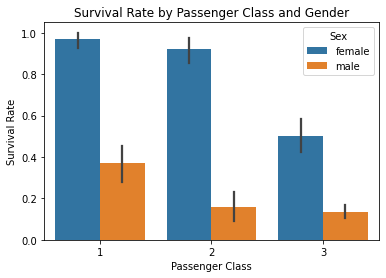

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Class and Gender wise Survival Rate
sns.barplot(x='Pclass', y='Survived',hue='Sex',data=df)
plt.title('Survival Rate by Passenger Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


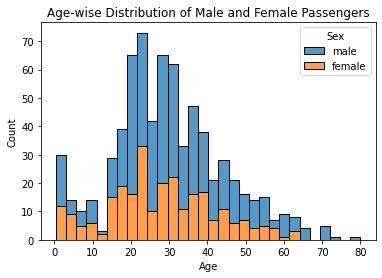

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age-wise distribution by gender
sns.histplot(data=df, x='Age', hue='Sex', multiple='stack', bins=30, edgecolor='black')

plt.title('Age-wise Distribution of Male and Female Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


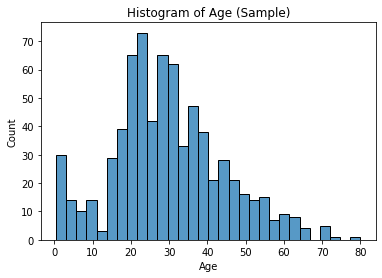

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Simple Histogram of Age
sns.histplot(data=df, x='Age', bins=30, edgecolor='black')
plt.title('Histogram of Age (Sample)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df['Embarked'].fillna('S',inplace=True)

In [14]:
df["Fare"].fillna(df["Fare"].median(), inplace=True)

In [16]:
# 1. Find mean and std of existing Age
age_mean = df['Age'].mean()
age_std = df['Age'].std()

# 2. Find how many values are missing
age_null_count = df['Age'].isnull().sum()

# 3. Generate random ages with same mean and std
random_ages = np.random.normal(age_mean, age_std, size=age_null_count)

# 4. Fill the missing Age values
df.loc[df['Age'].isnull(), 'Age'] = random_ages


In [17]:
df["FamilySize"]=df["SibSp"]+df["Parch"]+1

In [18]:
#Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False
df['IsAlone'] = df['FamilySize'] == 1
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,2,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2,False
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,1,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,51.803559,1,2,W./C. 6607,23.4500,NaN,S,4,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1,True


In [21]:
# Drop unwanted columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [22]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,male,22.000000,1,0,7.2500,S,2,False
1,1,1,female,38.000000,1,0,71.2833,C,2,False
2,1,3,female,26.000000,0,0,7.9250,S,1,True
3,1,1,female,35.000000,1,0,53.1000,S,2,False
4,0,3,male,35.000000,0,0,8.0500,S,1,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1,True
887,1,1,female,19.000000,0,0,30.0000,S,1,True
888,0,3,female,51.803559,1,2,23.4500,S,4,False
889,1,1,male,26.000000,0,0,30.0000,C,1,True


In [9]:
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(exclude=['number']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print(df.head())


   PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0            1         0       3   108    1  22.0      1      0     523   
1            2         1       1   190    0  38.0      1      0     596   
2            3         1       3   353    0  26.0      0      0     669   
3            4         1       1   272    0  35.0      1      0      49   
4            5         0       3    15    1  35.0      0      0     472   

      Fare  Cabin  Embarked  
0   7.2500    147         2  
1  71.2833     81         0  
2   7.9250    147         2  
3  53.1000     55         2  
4   8.0500    147         2  


In [35]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,1,22.000000,1,0,7.2500,2,2,0
1,1,1,0,38.000000,1,0,71.2833,0,2,0
2,1,3,0,26.000000,0,0,7.9250,2,1,1
3,1,1,0,35.000000,1,0,53.1000,2,2,0
4,0,3,1,35.000000,0,0,8.0500,2,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,1,1
887,1,1,0,19.000000,0,0,30.0000,2,1,1
888,0,3,0,51.803559,1,2,23.4500,2,4,0
889,1,1,1,26.000000,0,0,30.0000,0,1,1


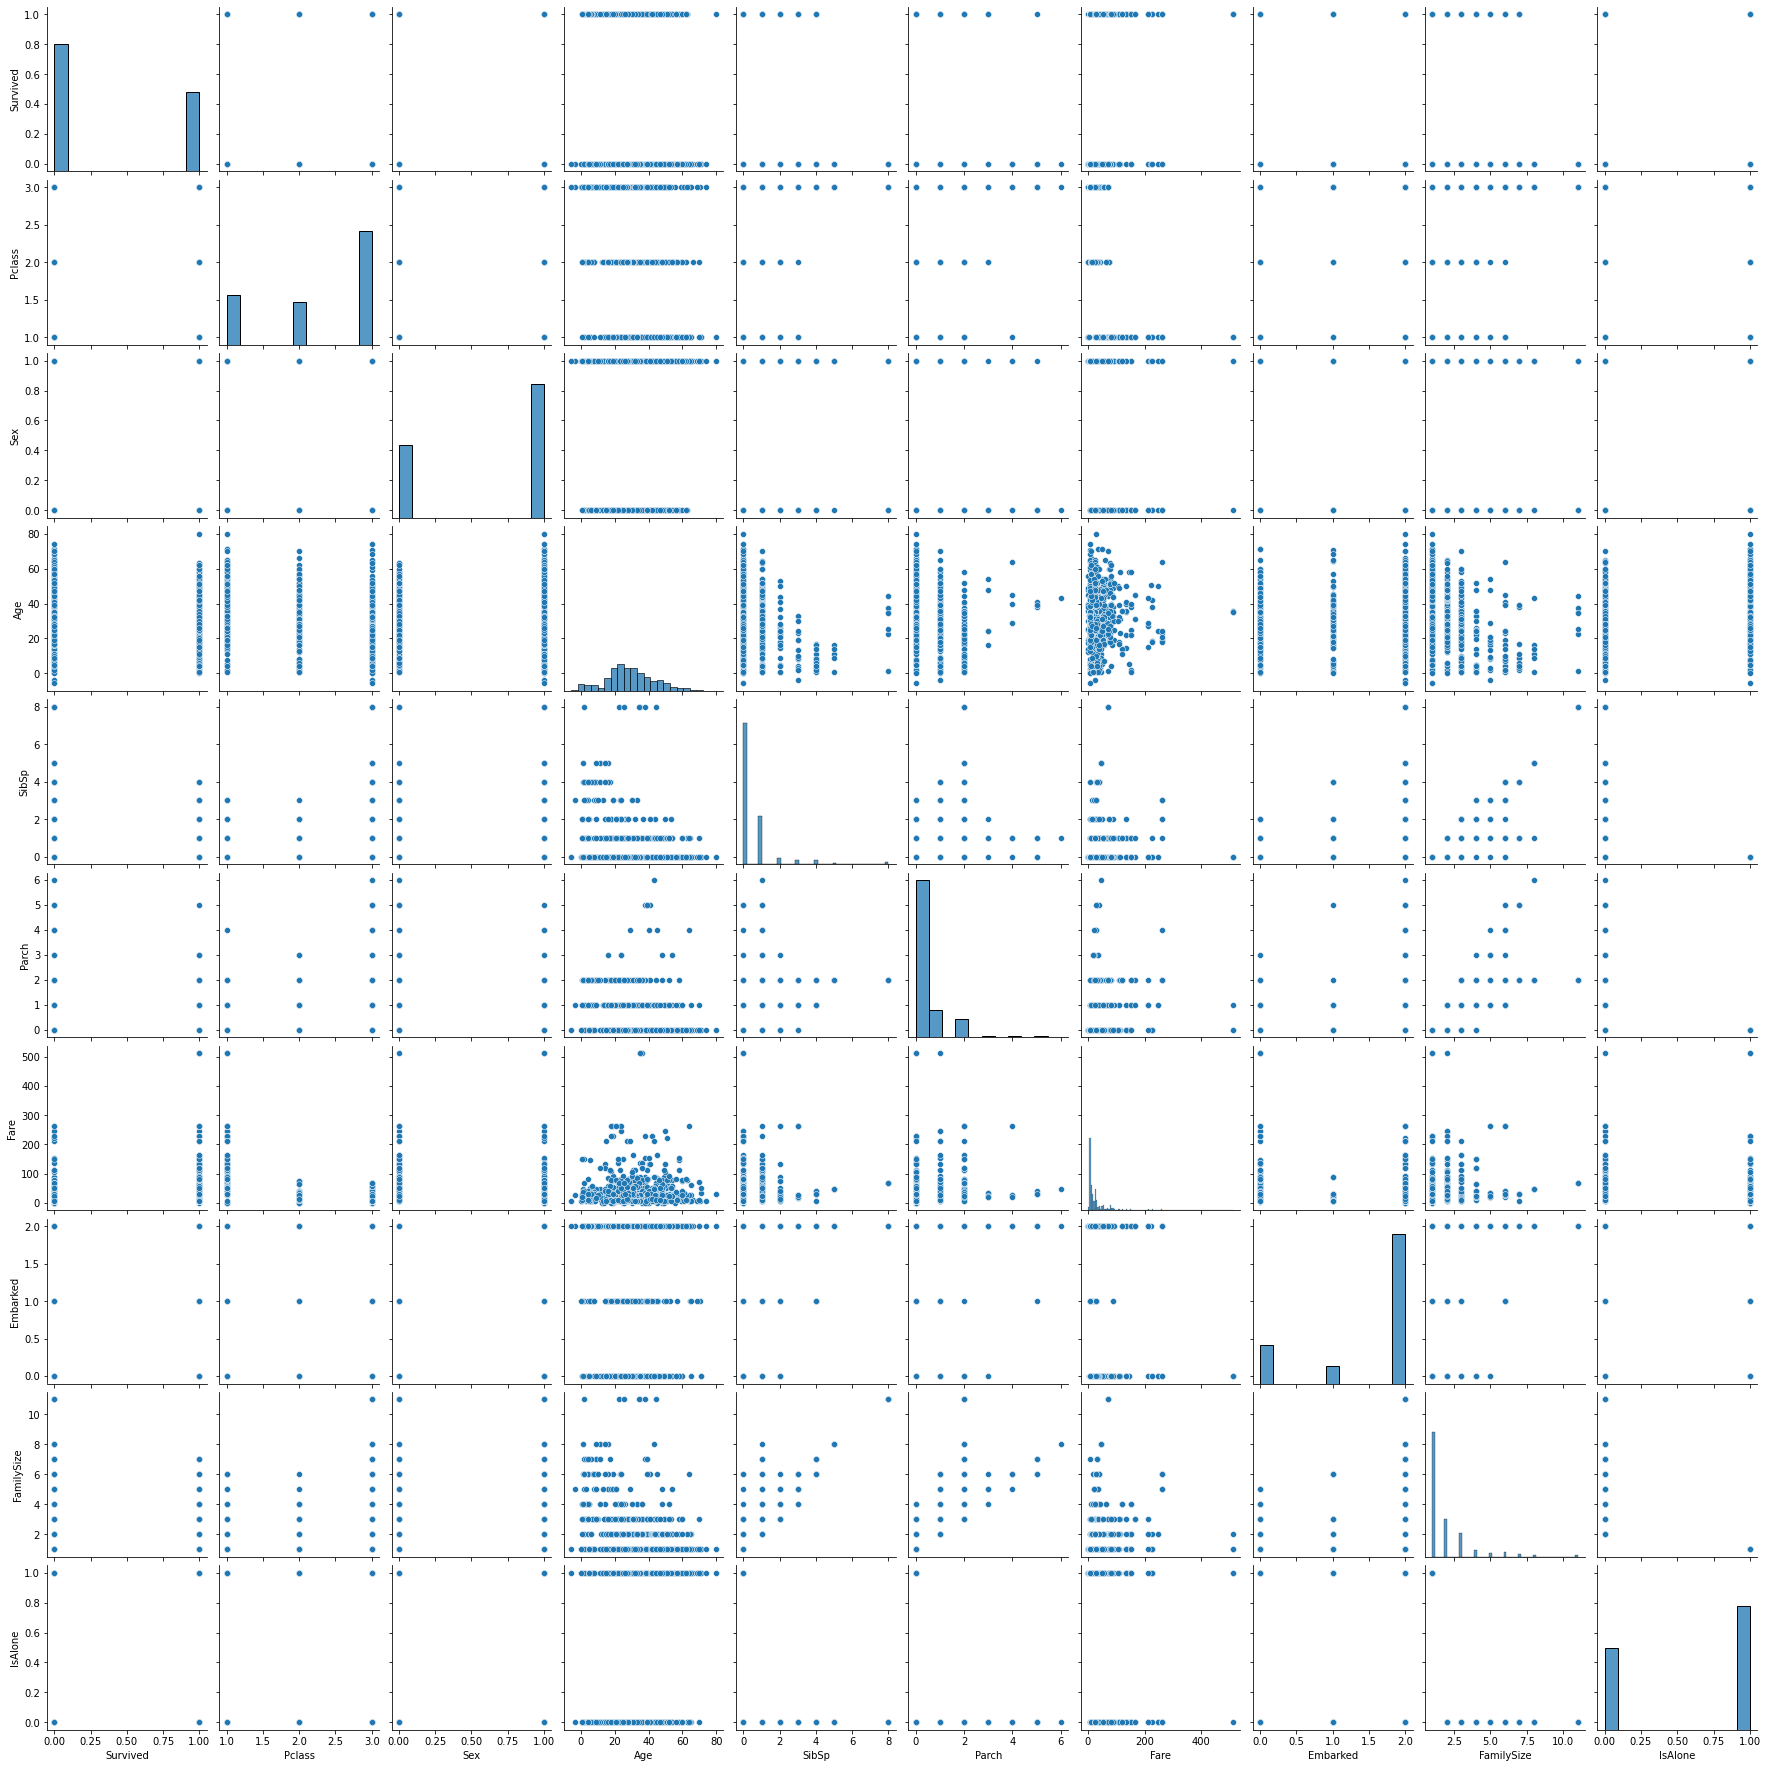

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Do a pairplot
sns.pairplot(df)

# Show the plot
plt.show()


In [10]:
X=df.drop(columns='Survived')
y=df['Survived']

In [11]:
X_train,X_validation,y_train,y_validation=train_test_split(X,y,test_size=0.1,random_state=42)

In [12]:
print(X_train.shape,X_validation.shape)

(801, 11) (90, 11)


In [13]:
print(y_train.shape,y_validation.shape)

(801,) (90,)


In [14]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
print("model trained successfully")

model trained successfully


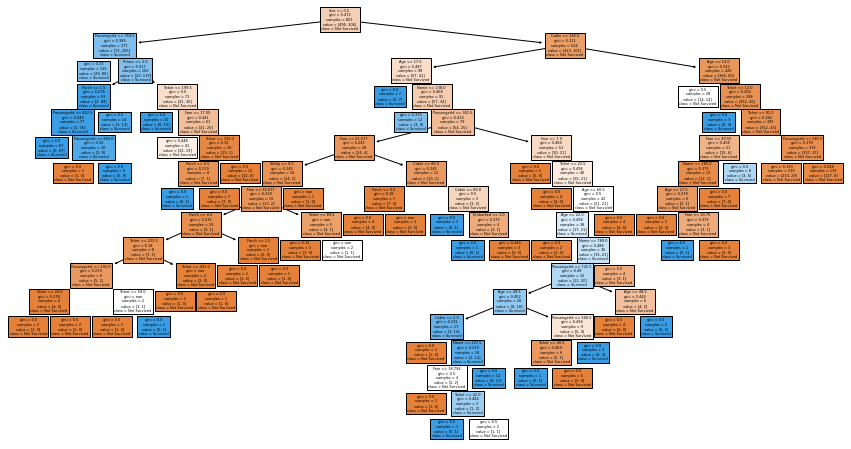

In [19]:
plt.figure(figsize=(15,8)) 
plot_tree(dt_model,filled=True,feature_names=X.columns,class_names=["Not Survived","Survived"])
plt.show()

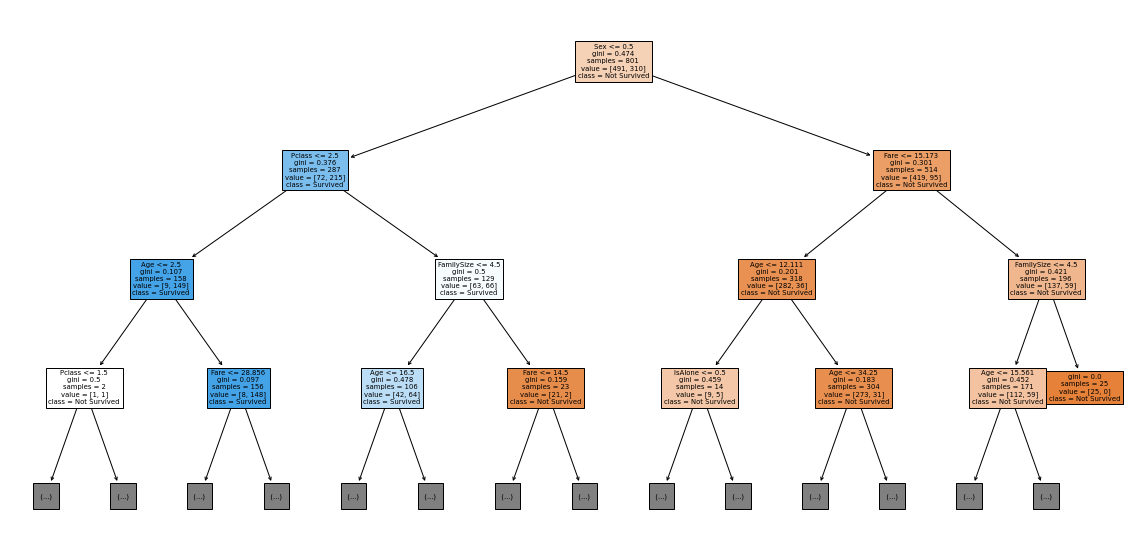

In [49]:
plt.figure(figsize=(20,10)) 
plot_tree(dt_model,filled=True,feature_names=X.columns,class_names=["Not Survived","Survived"],max_depth=3)
plt.show()

In [52]:
y_pred = dt_model.predict(X_validation)


In [53]:
print(classification_report(y_validation, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.90      0.85        58
           1       0.76      0.59      0.67        32

    accuracy                           0.79        90
   macro avg       0.78      0.75      0.76        90
weighted avg       0.79      0.79      0.78        90



In [55]:
print("Confusion Matrix:\n", confusion_matrix(y_validation, y_pred))
print("Accuracy:", accuracy_score(y_validation, y_pred))

Confusion Matrix:
 [[52  6]
 [13 19]]
Accuracy: 0.7888888888888889
